# Introdução

In [1]:
#Importando pacote
import pandas as pd

#Importando o conjunto de dados
dados = pd.read_csv("C:/Users/20221enpro0308/Downloads/areas.csv", sep = ";", decimal = ",")

#Mostrando dados
dados

,Id,Bloco,Andar,Final,Sala,Cozinha,Banheiro,Dorm,Rachadura,Infiltr
0,1,A,1,1,27.8,7.9,5.0,11.6,ausente,ausente
1,2,A,1,2,28.3,7.3,5.4,13.1,ausente,ausente
2,3,A,1,3,27.1,7.1,5.0,14.9,ausente,ausente
3,4,A,1,4,26.5,8.4,3.9,12.4,presente,presente
4,5,A,2,1,27.7,7.6,4.7,12.1,ausente,ausente
...,...,...,...,...,...,...,...,...,...,...
147,148,B,18,4,23.5,7.4,4.3,12.2,ausente,presente
148,149,B,19,1,24.1,8.3,4.8,12.9,ausente,ausente
149,150,B,19,2,24.1,8.0,4.5,10.9,ausente,ausente
150,151,B,19,3,23.0,8.5,4.3,11.7,ausente,presente


# 1. Vamos começar explorando o tipo de empreendimento de que tratam os dados. Para isso, verifique:
# a) Qual o número total de apartamentos no empreendimento?

In [2]:
len (dados)

152

# b) Quantos apartamentos existem por bloco?

In [3]:
dados['Bloco'].value_counts()

Bloco
A    76
B    76
Name: count, dtype: int64

# c) Quantos apartamentos existem por andar?

In [4]:
dados['Andar'].value_counts()

Andar
1     8
11    8
18    8
17    8
16    8
15    8
14    8
13    8
12    8
10    8
2     8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
19    8
Name: count, dtype: int64

# 2. Existe a suspeita de que os apartamentos tenham sido construídos com metragens diferentes. O arquivo de dados traz as áreas de cada cômodo em separado. Acrescente uma nova coluna calculando a área útil total de cada apartamento.

In [5]:
#criando nova coluna com base em outras existentes
dados['Area Total'] = dados['Sala'] + dados['Cozinha'] + dados['Banheiro'] + dados['Dorm']
dados

,Id,Bloco,Andar,Final,Sala,Cozinha,Banheiro,Dorm,Rachadura,Infiltr,Area Total
0,1,A,1,1,27.8,7.9,5.0,11.6,ausente,ausente,52.3
1,2,A,1,2,28.3,7.3,5.4,13.1,ausente,ausente,54.1
2,3,A,1,3,27.1,7.1,5.0,14.9,ausente,ausente,54.1
3,4,A,1,4,26.5,8.4,3.9,12.4,presente,presente,51.2
4,5,A,2,1,27.7,7.6,4.7,12.1,ausente,ausente,52.1
...,...,...,...,...,...,...,...,...,...,...,...
147,148,B,18,4,23.5,7.4,4.3,12.2,ausente,presente,47.4
148,149,B,19,1,24.1,8.3,4.8,12.9,ausente,ausente,50.1
149,150,B,19,2,24.1,8.0,4.5,10.9,ausente,ausente,47.5
150,151,B,19,3,23.0,8.5,4.3,11.7,ausente,presente,47.5


# 3. Para a área de cada cômodo e para a área útil total (isto é, para as variáveis quantitativas contínuas), faça um histograma

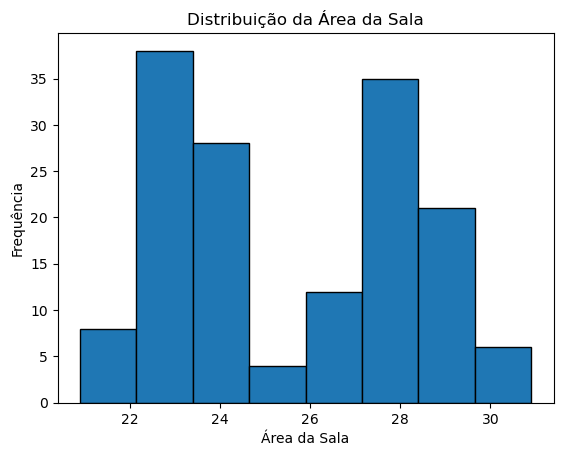

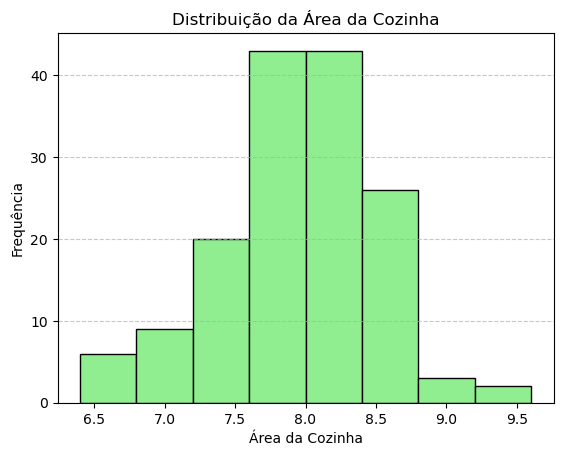

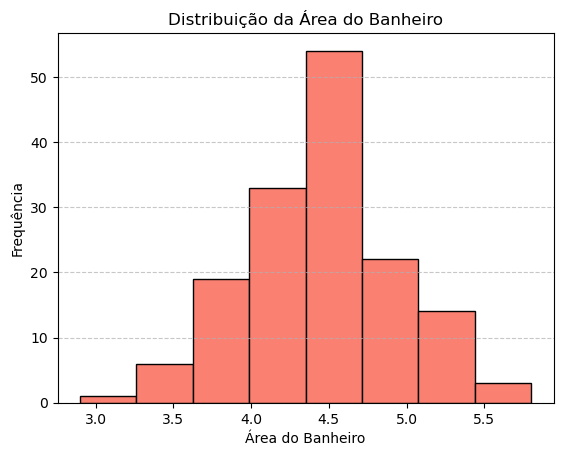

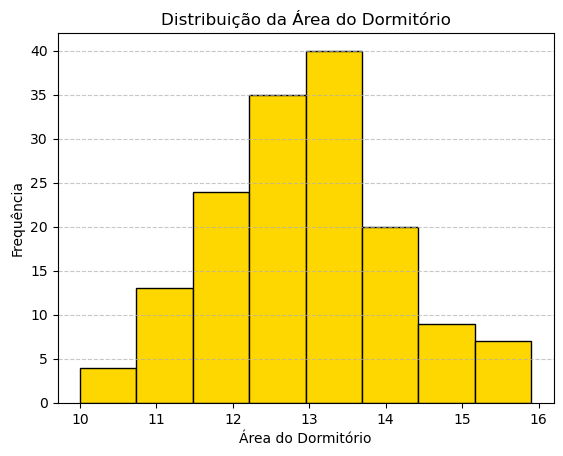

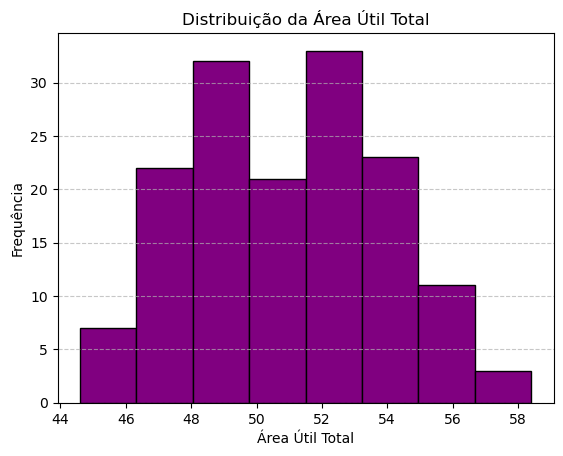

In [6]:
#Importando pacotes de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da Área da Sala
plt.hist(dados['Sala'], bins = 8, edgecolor = "black")
plt.title("Distribuição da Área da Sala")
plt.xlabel("Área da Sala")
plt.ylabel("Frequência")
plt.show()

# Histograma da Área da Cozinha
plt.hist(dados['Cozinha'], bins=8, edgecolor="black", color='lightgreen')
plt.title("Distribuição da Área da Cozinha")
plt.xlabel("Área da Cozinha")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma da Área do Banheiro
plt.hist(dados['Banheiro'], bins=8, edgecolor="black", color='salmon')
plt.title("Distribuição da Área do Banheiro")
plt.xlabel("Área do Banheiro")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma da Área do Dormitório
plt.hist(dados['Dorm'], bins=8, edgecolor="black", color='gold')
plt.title("Distribuição da Área do Dormitório")
plt.xlabel("Área do Dormitório")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograma da Área Útil Total
plt.hist(dados['Area Total'], bins=8, edgecolor="black", color='purple')
plt.title("Distribuição da Área Útil Total")
plt.xlabel("Área Útil Total")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Agora, em separado para o bloco A e o bloco B:
# a. Calcule a média e o desvio-padrão da área de cada cômodo e também da área total.

In [7]:
# Agrupando por bloco e calculando média e desvio-padrão
estatisticas_blocos = dados.groupby('Bloco').agg({
    'Sala': ['mean', 'std'],
    'Cozinha': ['mean', 'std'],
    'Banheiro': ['mean', 'std'],
    'Dorm': ['mean', 'std'],
    'Area Total': ['mean', 'std']
})

# Exibindo o resultado
estatisticas_blocos

Sala             Cozinha            Banheiro                 Dorm  \
            mean       std      mean       std      mean       std       mean   
Bloco                                                                           
A      28.093421  1.082631  7.928947  0.465279  4.450000  0.462313  12.950000   
B      23.131579  0.848875  7.881579  0.604805  4.464474  0.515805  12.928947   

                Area Total            
            std       mean       std  
Bloco                                 
A      1.172860  53.422368  1.771749  
B      1.176528  48.406579  1.537906

# b. Construa boxplots e compare as áreas para cada cômodo considerado.

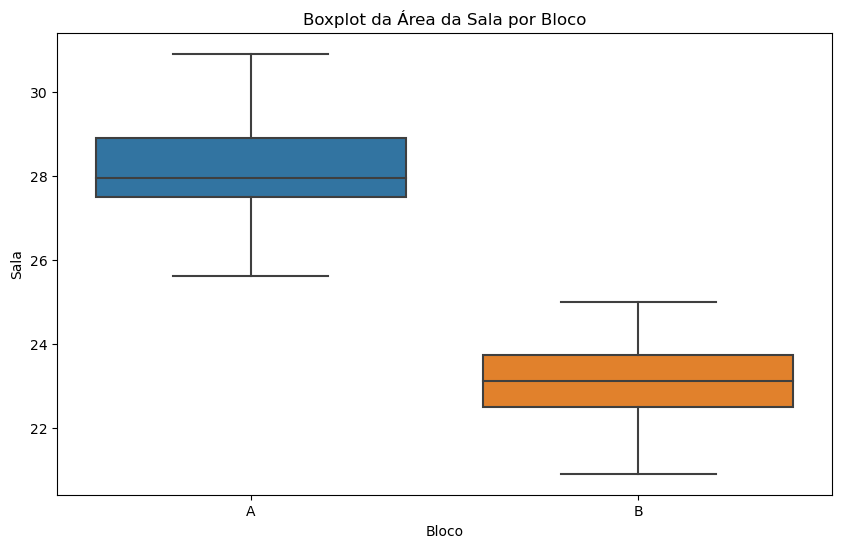

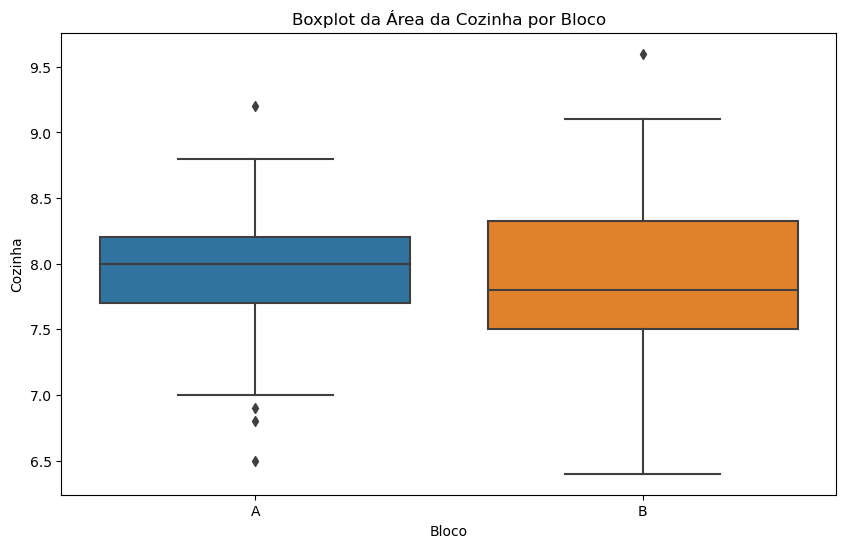

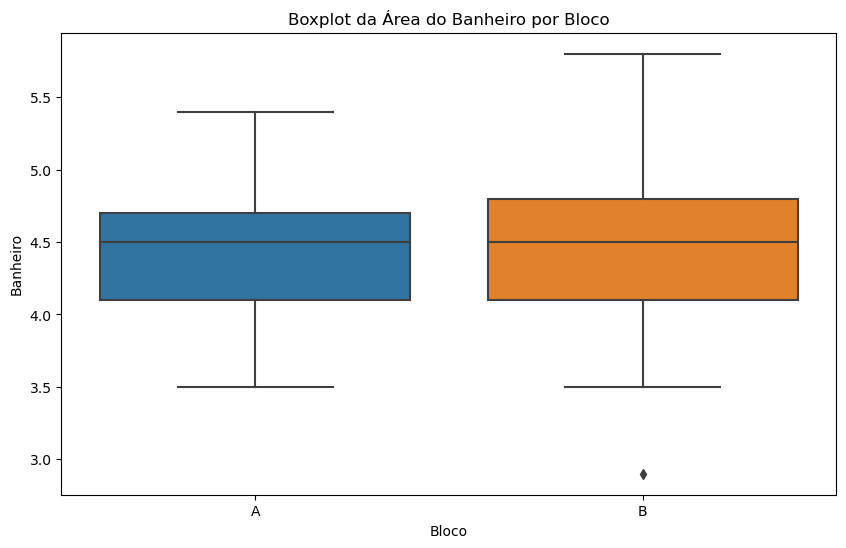

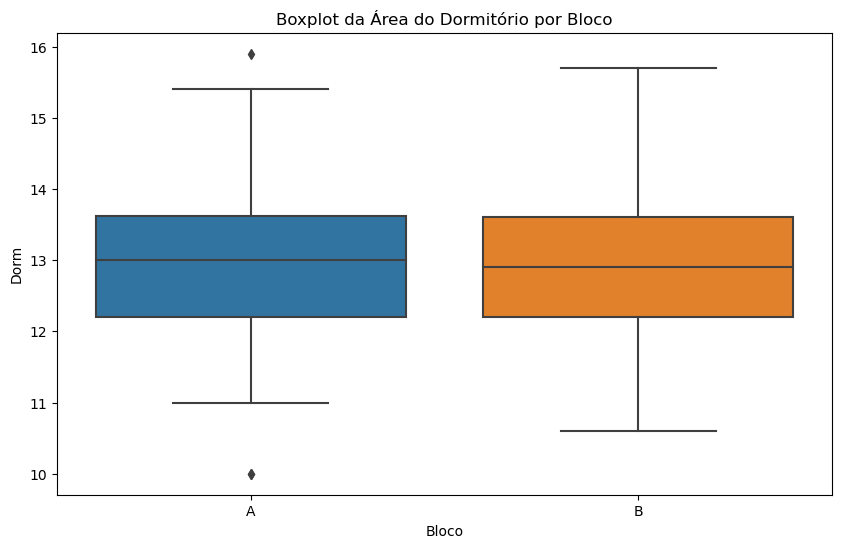

In [8]:
# Boxplot para a área da Sala
plt.figure(figsize=(10, 6))
sns.boxplot(x="Bloco", y="Sala", data=dados)
plt.title("Boxplot da Área da Sala por Bloco")
plt.show()

# Boxplot para a área da Cozinha
plt.figure(figsize=(10, 6))
sns.boxplot(x="Bloco", y="Cozinha", data=dados)
plt.title("Boxplot da Área da Cozinha por Bloco")
plt.show()

# Boxplot para a área do Banheiro
plt.figure(figsize=(10, 6))
sns.boxplot(x="Bloco", y="Banheiro", data=dados)
plt.title("Boxplot da Área do Banheiro por Bloco")
plt.show()

# Boxplot para a área do Dormitório
plt.figure(figsize=(10, 6))
sns.boxplot(x="Bloco", y="Dorm", data=dados)
plt.title("Boxplot da Área do Dormitório por Bloco")
plt.show()

# c. Com base em seus achados, você diria que existem diferenças nas áreas dos apartamentos dos blocos A e B? Em caso positivo, qual (is) cômodo (s) apresenta (m) o problema?

In [9]:
#Podemos observar que existem diferenças significativas nas áreas dos apartamentos dos blocos A e B, principalmente em relação à área da sala. A mediana da área da sala no bloco A é de 28, enquanto no bloco B é de 23, indicando uma diferença considerável entre os dois blocos. Além disso, ambos os blocos apresentam quartis parecidos e com pouca variedade de médias, o que sugere que a maioria dos apartamentos de cada bloco segue um padrão sem muita dispersão.

#Já para as áreas da cozinha e do banheiro, as medianas não apresentam uma diferença tão grande quanto a da sala. No entanto, há uma variedade nas médias, o que pode indicar que alguns apartamentos têm áreas ligeiramente maiores ou menores nesses cômodos.

#Por fim, a área do dormitório é a mais parecida entre os dois blocos, tanto em termos de medianas quanto de quartis.

# 5. Agora vamos explorar os dados referentes a problemas estruturais (rachaduras e infiltrações).
# a. Construa tabelas de frequências e gráficos (barras ou pizza) para cada uma das duas variáveis

Tabela de Frequência - Rachadura:
Rachadura
ausente     85
presente    67
Name: count, dtype: int64


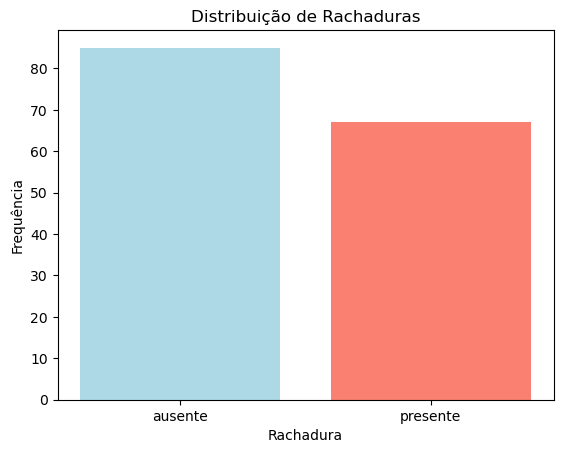

Tabela de Frequência - Infiltração:
Infiltr
ausente     108
presente     44
Name: count, dtype: int64


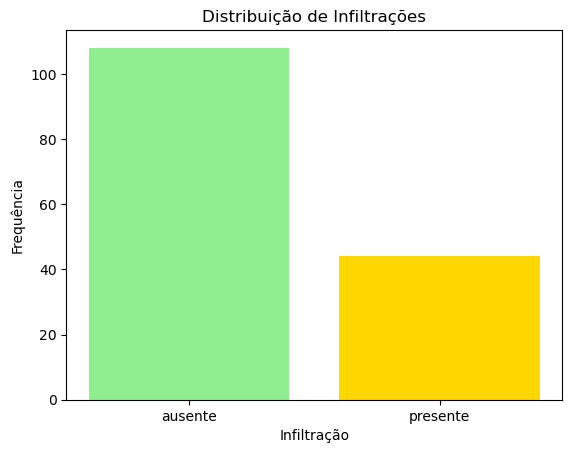

In [10]:
# Tabela de frequência para Rachadura
tabela_rachadura = dados['Rachadura'].value_counts()
print("Tabela de Frequência - Rachadura:")
print(tabela_rachadura)

# Gráfico de barras para Rachadura
plt.bar(tabela_rachadura.index, tabela_rachadura.values, color=['lightblue', 'salmon'])
plt.title("Distribuição de Rachaduras")
plt.xlabel("Rachadura")
plt.ylabel("Frequência")
plt.show()

# Tabela de frequência para Infiltração
tabela_infiltracao = dados['Infiltr'].value_counts()
print("Tabela de Frequência - Infiltração:")
print(tabela_infiltracao)

# Gráfico de barras para Infiltração
plt.bar(tabela_infiltracao.index, tabela_infiltracao.values, color=['lightgreen', 'gold'])
plt.title("Distribuição de Infiltrações")
plt.xlabel("Infiltração")
plt.ylabel("Frequência")
plt.show()

# b. Use a tabulação cruzada para verificar se há diferença entre a ocorrência de rachaduras e infiltrações para os blocos A e B.

In [11]:
# Tabela cruzada para Rachadura por Bloco
tabela_rachadura_bloco = pd.crosstab(dados['Bloco'], dados['Rachadura'])
print("Tabela Cruzada - Rachadura por Bloco:")
print(tabela_rachadura_bloco)

# Tabela cruzada para Infiltração por Bloco
tabela_infiltracao_bloco = pd.crosstab(dados['Bloco'], dados['Infiltr'])
print("Tabela Cruzada - Infiltração por Bloco:")
print(tabela_infiltracao_bloco)

Tabela Cruzada - Rachadura por Bloco:
Rachadura  ausente  presente
Bloco                       
A               43        33
B               42        34
Tabela Cruzada - Infiltração por Bloco:
Infiltr  ausente  presente
Bloco                     
A             53        23
B             55        21


# c. Crie uma nova coluna, com o nome Andar, e nela divida os apartamentos em duas categorias: baixo (até nono andar) e alto (décimo andar em diante)

In [12]:
# Criando a nova coluna
dados['Andar Categoria'] = ['Alto' if x >= 10 else 'Baixo' for x in dados['Andar']]

# Exibindo os dados atualizados
dados

,Id,Bloco,Andar,Final,Sala,Cozinha,Banheiro,Dorm,Rachadura,Infiltr,Area Total,Andar Categoria
0,1,A,1,1,27.8,7.9,5.0,11.6,ausente,ausente,52.3,Baixo
1,2,A,1,2,28.3,7.3,5.4,13.1,ausente,ausente,54.1,Baixo
2,3,A,1,3,27.1,7.1,5.0,14.9,ausente,ausente,54.1,Baixo
3,4,A,1,4,26.5,8.4,3.9,12.4,presente,presente,51.2,Baixo
4,5,A,2,1,27.7,7.6,4.7,12.1,ausente,ausente,52.1,Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...
147,148,B,18,4,23.5,7.4,4.3,12.2,ausente,presente,47.4,Alto
148,149,B,19,1,24.1,8.3,4.8,12.9,ausente,ausente,50.1,Alto
149,150,B,19,2,24.1,8.0,4.5,10.9,ausente,ausente,47.5,Alto
150,151,B,19,3,23.0,8.5,4.3,11.7,ausente,presente,47.5,Alto


# d. Usando tabelas e / ou gráficos, estude a ocorrência de rachaduras e infiltrações em separado para cada categoria.

Tabela Cruzada - Rachadura por Categoria de Andar:
Rachadura        ausente  presente
Andar Categoria                   
Alto                  45        35
Baixo                 40        32


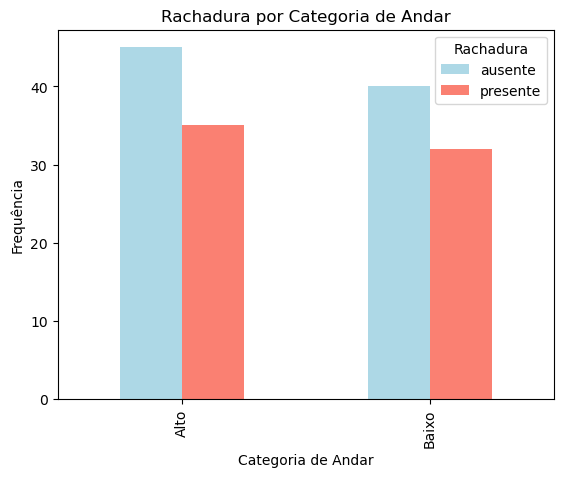

Tabela Cruzada - Infiltração por Categoria de Andar:
Infiltr          ausente  presente
Andar Categoria                   
Alto                  49        31
Baixo                 59        13


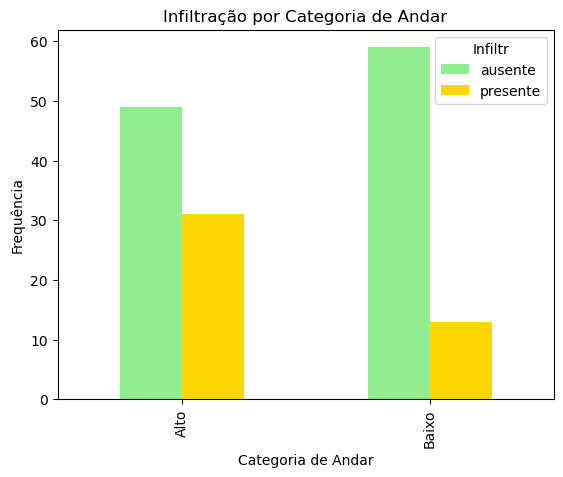

In [14]:
# Tabela cruzada para Rachadura por Categoria de Andar
tabela_rachadura_andar = pd.crosstab(dados['Andar Categoria'], dados['Rachadura'])
print("Tabela Cruzada - Rachadura por Categoria de Andar:")
print(tabela_rachadura_andar)

# Gráfico de barras para Rachadura por Categoria de Andar
tabela_rachadura_andar.plot.bar(color=['lightblue', 'salmon'])
plt.title("Rachadura por Categoria de Andar")
plt.xlabel("Categoria de Andar")
plt.ylabel("Frequência")
plt.show()

# Tabela cruzada para Infiltração por Categoria de Andar
tabela_infiltracao_andar = pd.crosstab(dados['Andar Categoria'], dados['Infiltr'])
print("Tabela Cruzada - Infiltração por Categoria de Andar:")
print(tabela_infiltracao_andar)

# Gráfico de barras para Infiltração por Categoria de Andar
tabela_infiltracao_andar.plot.bar(color=['lightgreen', 'gold'])
plt.title("Infiltração por Categoria de Andar")
plt.xlabel("Categoria de Andar")
plt.ylabel("Frequência")
plt.show()